In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import seaborn as sns
import yfinance as yf
sns.set()

In [2]:
tickers=['^NSEBANK','^NSEI']
data = pd.DataFrame()
for ticker in tickers:
    data[ticker]=yf.download(ticker,start='2010-01-01',end='2025-7-7')['Close']

C:\Users\swana\AppData\Local\Temp\ipykernel_12016\690378777.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[ticker]=yf.download(ticker,start='2010-01-01',end='2025-7-7')['Close']
[*********************100%***********************]  1 of 1 completed
C:\Users\swana\AppData\Local\Temp\ipykernel_12016\690378777.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data[ticker]=yf.download(ticker,start='2010-01-01',end='2025-7-7')['Close']
[*********************100%***********************]  1 of 1 completed


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3532 entries, 2010-01-04 to 2025-07-04
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ^NSEBANK  3532 non-null   float64
 1   ^NSEI     3530 non-null   float64
dtypes: float64(2)
memory usage: 82.8 KB


In [4]:
data.head()

,^NSEBANK,^NSEI
Date,,
2010-01-04,9112.244141,5232.200195
2010-01-05,9192.043945,5277.899902
2010-01-06,9222.892578,5281.799805
2010-01-07,9192.843750,5263.100098
2010-01-08,9160.593750,5244.750000


In [5]:
data.isna().sum()

^NSEBANK    0
^NSEI       2
dtype: int64

In [6]:
## Dropping Null Values
data.dropna(inplace=True)

In [7]:
data.isna().sum()

^NSEBANK    0
^NSEI       0
dtype: int64

In [8]:
data=data.asfreq('B')

In [9]:
data.head()

,^NSEBANK,^NSEI
Date,,
2010-01-04,9112.244141,5232.200195
2010-01-05,9192.043945,5277.899902
2010-01-06,9222.892578,5281.799805
2010-01-07,9192.843750,5263.100098
2010-01-08,9160.593750,5244.750000


In [10]:
data.isna().sum()

^NSEBANK    515
^NSEI       515
dtype: int64

In [11]:
data.fillna(method='ffill',inplace=True)

C:\Users\swana\AppData\Local\Temp\ipykernel_12016\286314875.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill',inplace=True)


In [12]:
data.isna().sum()

^NSEBANK    0
^NSEI       0
dtype: int64

In [13]:
## Simplyfying the Datasets
data['Market_value']=data['^NSEBANK']

In [14]:
## Adding Returns to the dataframe
data['returns']=data.Market_value.pct_change(1)*100
data=data.iloc[1:]
data.head()

,^NSEBANK,^NSEI,Market_value,returns
Date,,,,
2010-01-05,9192.043945,5277.899902,9192.043945,0.875743
2010-01-06,9222.892578,5281.799805,9222.892578,0.335601
2010-01-07,9192.843750,5263.100098,9192.843750,-0.325807
2010-01-08,9160.593750,5244.750000,9160.593750,-0.350816
2010-01-11,9173.443359,5249.399902,9173.443359,0.140270


In [15]:
data.head()

,^NSEBANK,^NSEI,Market_value,returns
Date,,,,
2010-01-05,9192.043945,5277.899902,9192.043945,0.875743
2010-01-06,9222.892578,5281.799805,9222.892578,0.335601
2010-01-07,9192.843750,5263.100098,9192.843750,-0.325807
2010-01-08,9160.593750,5244.750000,9160.593750,-0.350816
2010-01-11,9173.443359,5249.399902,9173.443359,0.140270


In [16]:
## Deleting Extra Columns 
del data['^NSEBANK'],data['^NSEI']

In [17]:
data.head()

,Market_value,returns
Date,,
2010-01-05,9192.043945,0.875743
2010-01-06,9222.892578,0.335601
2010-01-07,9192.843750,-0.325807
2010-01-08,9160.593750,-0.350816
2010-01-11,9173.443359,0.140270


In [18]:
data.describe()

,Market_value,returns
count,4044.000000,4044.000000
mean,25080.275174,0.055750
std,13320.778106,1.442205
min,7798.458984,-16.734013
25%,12424.555664,-0.537177
50%,22265.691406,0.000000
75%,35125.688477,0.646662
max,57459.449219,19.437570


In [19]:
## Spliting the Date
size=int(len(data)*0.8)
train=data.iloc[:size]
test=data.iloc[size:]

In [20]:
## Seting trainig data as df for simplicity
df=train.copy()

In [21]:
train.tail()

,Market_value,returns
Date,,
2022-05-24,34289.750000,0.124235
2022-05-25,34339.101562,0.143925
2022-05-26,35094.492188,2.199797
2022-05-27,35612.886719,1.477139
2022-05-30,35826.531250,0.599908


In [22]:
df.tail()

,Market_value,returns
Date,,
2022-05-24,34289.750000,0.124235
2022-05-25,34339.101562,0.143925
2022-05-26,35094.492188,2.199797
2022-05-27,35612.886719,1.477139
2022-05-30,35826.531250,0.599908


In [23]:
test.head()

,Market_value,returns
Date,,
2022-05-31,35486.984375,-0.947753
2022-06-01,35620.386719,0.375919
2022-06-02,35613.234375,-0.020079
2022-06-03,35274.640625,-0.950753
2022-06-06,35309.789062,0.099642


## ploting ACF anf PACF plots

Text(0.5, 1.0, 'ACF Bank Nifty')

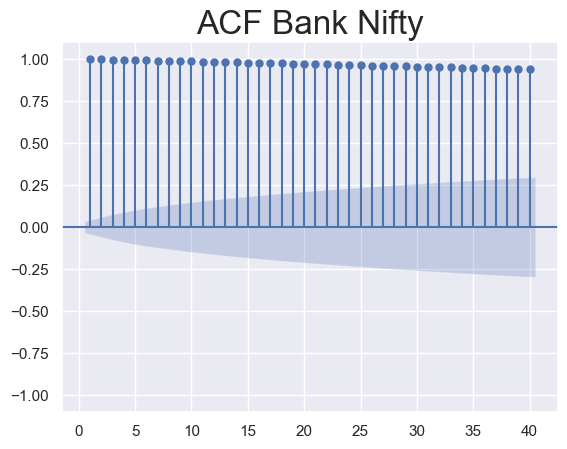

In [24]:
## ACF
sgt.plot_acf(df.Market_value,lags=40,zero=False)
plt.ylim(-1.1,1.1)
plt.title("ACF Bank Nifty",size=24)

Text(0.5, 1.0, 'PACF Bank Nifty')

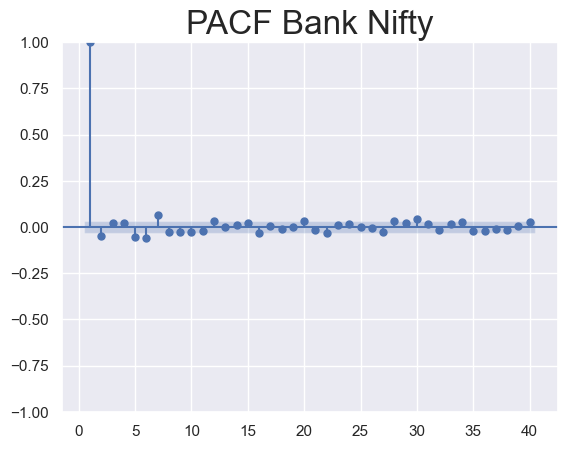

In [25]:
## Pacf 
sgt.plot_pacf(df.Market_value,lags=40,zero=False,method=('ols'))
plt.title("PACF Bank Nifty",size=24)

In [26]:
## Defining LLR Test for Easy Comparison
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Multiple AR models for many Lags and comparing them (for Prices)


In [27]:
model_ar1 = ARIMA(df.Market_value, order=(1,0,0))
result_ar1=model_ar1.fit()
result_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 3235
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -23162.090
Date:                Sun, 14 Sep 2025   AIC                          46330.179
Time:                        13:38:47   BIC                          46348.424
Sample:                    01-05-2010   HQIC                         46336.717
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.981e+04   1.15e+04      1.723      0.085   -2725.052    4.24e+04
ar.L1          0.9997      0.001   1663.404      0.000       0.998       1.001
sigma2      9.672e+04    834.597    115.893      0.000    9.51e+04    9.84e+04
===================================================================================
Ljung-Box (L1) (Q):                   6.84   Jarque-Bera (JB):             29640.02
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               7.79   Skew:                            -0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
model_ar2 = ARIMA(df.Market_value, order=(2,0,0))
result_ar2=model_ar2.fit()
result_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 3235
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -23158.558
Date:                Sun, 14 Sep 2025   AIC                          46325.117
Time:                        13:38:47   BIC                          46349.444
Sample:                    01-05-2010   HQIC                         46333.833
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.981e+04   1.04e+04      1.914      0.056    -474.643    4.01e+04
ar.L1          1.0463      0.010    106.102      0.000       1.027       1.066
ar.L2         -0.0467      0.010     -4.754      0.000      -0.066      -0.027
sigma2      9.654e+04    831.814    116.063      0.000    9.49e+04    9.82e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             29997.43
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.80   Skew:                            -0.40
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
model_ar3 = ARIMA(df.Market_value, order=(3,0,0))
result_ar3=model_ar3.fit()
result_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Market_value   No. Observations:                 3235
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -23157.893
Date:                Sun, 14 Sep 2025   AIC                          46325.786
Time:                        13:38:47   BIC                          46356.195
Sample:                    01-05-2010   HQIC                         46336.682
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.981e+04      0.474   4.18e+04      0.000    1.98e+04    1.98e+04
ar.L1          1.0472      0.010    106.113      0.000       1.028       1.067
ar.L2         -0.0679      0.013     -5.289      0.000      -0.093      -0.043
ar.L3          0.0203      0.009      2.250      0.024       0.003       0.038
sigma2      9.653e+04    837.102    115.318      0.000    9.49e+04    9.82e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             30404.90
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               7.79   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.49e+18. Standard errors may be unstable.
"""

We stopped here only because p>z value is way more than our significance value so we will use ar1 model I  didnt stopped on ar2 model because I wanted to see can next model will be better than the previous one

## Performing LLR Test on All three model

In [30]:
LLR_test(model_ar1,model_ar2)

np.float64(0.008)

In [31]:
LLR_test(model_ar2,model_ar3)

np.float64(0.249)

As this ar3 value is more than our significance value of 5% so we will use ar2 model

## Analysing the residuals

In [32]:
df['res_price']=result_ar2.resid

In [33]:
## Residual Mean
df.res_price.mean()

np.float64(4.56661265124857)

In [34]:
## Residual Variance
df.res_price.var()

131382.59223488218

In [35]:
## Dicky Fuller Test
sts.adfuller(df.res_price)

(np.float64(-16.169989420591197),
 np.float64(4.3750326090389256e-29),
 10,
 3224,
 {'1%': np.float64(-3.4323799361717584),
  '5%': np.float64(-2.862436903575556),
  '10%': np.float64(-2.5672474414633735)},
 np.float64(45875.85316915356))

Text(0.5, 1.0, 'ACF of Residuals FOR Price')

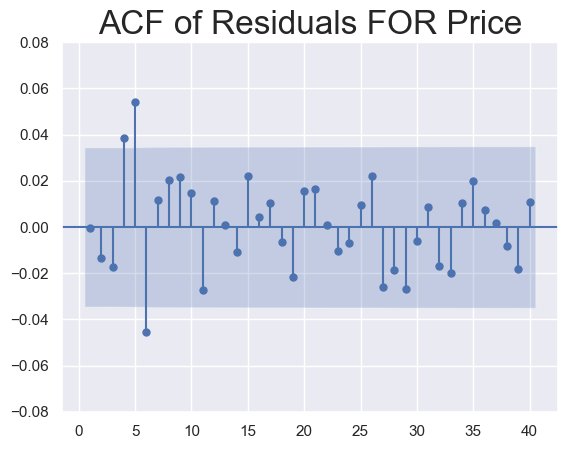

In [36]:
## Ploting ACF for Residuals
sgt.plot_acf(df.res_price,lags=40,zero=False)
plt.ylim(-0.08,0.08)
plt.title("ACF of Residuals FOR Price",size=24)

Text(0.5, 1.0, 'PACF of Residuals FOR Price')

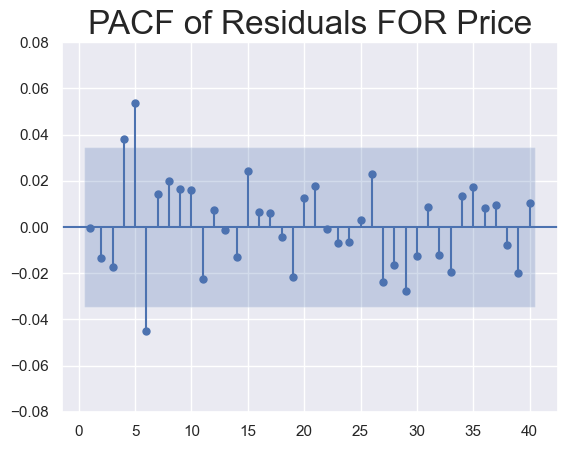

In [37]:
## Ploting PACF for Residuals
sgt.plot_pacf(df.res_price,lags=40,zero=False)
plt.ylim(-0.08,0.08)
plt.title("PACF of Residuals FOR Price",size=24)

## Now calculating The same Things for returns

In [38]:
## Running Dicky Fuller test for Returns
sts.adfuller(df.returns)

(np.float64(-16.59802883443395),
 np.float64(1.7746991329163392e-29),
 10,
 3224,
 {'1%': np.float64(-3.4323799361717584),
  '5%': np.float64(-2.862436903575556),
  '10%': np.float64(-2.5672474414633735)},
 np.float64(11842.696872288807))

## Ploting PACF and ACF for Returns

(-0.1, 0.1)

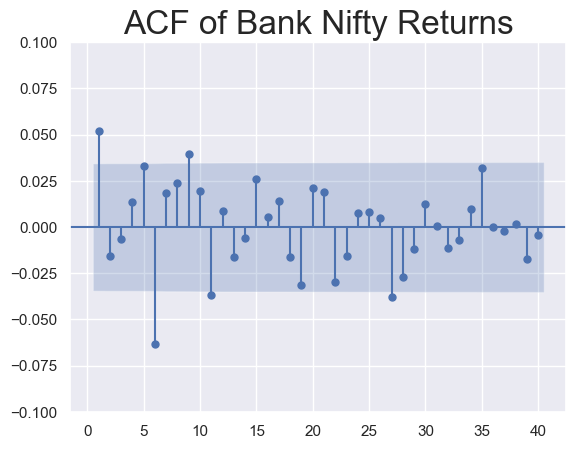

In [39]:
sgt.plot_acf(df.returns,lags=40,zero=False)
plt.title("ACF of Bank Nifty Returns",size=24)
plt.ylim(-0.1,0.1)

(-0.1, 0.1)

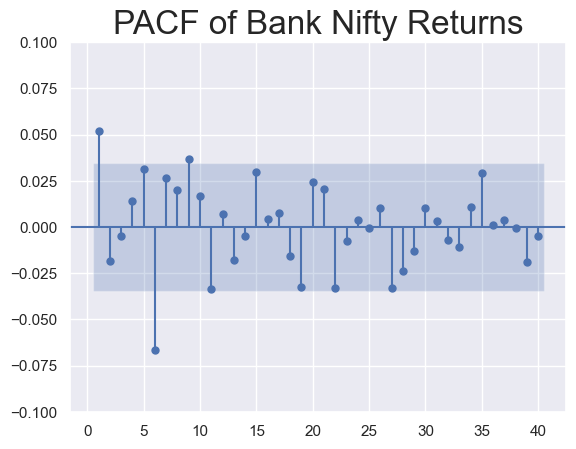

In [40]:
sgt.plot_pacf(df.returns,lags=40,zero=False)
plt.title("PACF of Bank Nifty Returns",size=24)
plt.ylim(-0.1,0.1)

## AR Models for Returns

In [41]:
model_ret_ar1=ARIMA(df.returns, order=(1,0,0))
results_ret_ar1 = model_ret_ar1.fit()
results_ret_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 3235
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -5981.493
Date:                Sun, 14 Sep 2025   AIC                          11968.987
Time:                        13:38:50   BIC                          11987.232
Sample:                    01-05-2010   HQIC                         11975.525
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0542      0.029      1.896      0.058      -0.002       0.110
ar.L1          0.0519      0.014      3.837      0.000       0.025       0.078
sigma2         2.3634      0.019    121.989      0.000       2.325       2.401
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36762.10
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.28
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
model_ret_ar2=ARIMA(df.returns, order=(2,0,0))
results_ret_ar2 = model_ret_ar2.fit()
results_ret_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 3235
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -5980.932
Date:                Sun, 14 Sep 2025   AIC                          11969.865
Time:                        13:38:50   BIC                          11994.192
Sample:                    01-05-2010   HQIC                         11978.582
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0542      0.029      1.896      0.058      -0.002       0.110
ar.L1          0.0529      0.014      3.897      0.000       0.026       0.079
ar.L2         -0.0186      0.010     -1.841      0.066      -0.038       0.001
sigma2         2.3626      0.019    122.028      0.000       2.325       2.401
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36831.05
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
model_ret_ar3=ARIMA(df.returns, order=(3,0,0))
results_ret_ar3 = model_ret_ar3.fit()
results_ret_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                returns   No. Observations:                 3235
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -5980.896
Date:                Sun, 14 Sep 2025   AIC                          11971.792
Time:                        13:38:51   BIC                          12002.201
Sample:                    01-05-2010   HQIC                         11982.688
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0542      0.029      1.875      0.061      -0.002       0.111
ar.L1          0.0528      0.014      3.849      0.000       0.026       0.080
ar.L2         -0.0184      0.010     -1.816      0.069      -0.038       0.001
ar.L3         -0.0047      0.011     -0.427      0.669      -0.027       0.017
sigma2         2.3625      0.020    119.334      0.000       2.324       2.401
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36954.29
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

We stopped here only because p>z value is way more than our significance value so we will use ar1 model I  didnt stopped on ar2 model because I wanted to see can next model will be better than the previous one

## Performing LLR Test on Returns Value

In [44]:
LLR_test(model_ret_ar1,model_ret_ar2)

np.float64(0.289)

In [45]:
LLR_test(model_ret_ar2,model_ret_ar3)

np.float64(0.787)

As this both values are more than our significance value of 5% so we will use ar1 model

## Normalising the values

In [46]:
## Setting some benchmarks
benchmark=df.Market_value.iloc[0]
df['norm']=df.Market_value/benchmark*100

In [47]:
df.head()

,Market_value,returns,res_price,norm
Date,,,,
2010-01-05,9192.043945,0.875743,-10622.363076,100.000000
2010-01-06,9222.892578,0.335601,26.923951,100.335601
2010-01-07,9192.843750,-0.325807,-35.584533,100.008701
2010-01-08,9160.593750,-0.350816,-34.955097,99.657854
2010-01-11,9173.443359,0.140270,10.234775,99.797645


In [48]:
## Dickey Fuller Test for normalisation
sts.adfuller(df.norm)

(np.float64(-0.7300536711250394),
 np.float64(0.838810642684706),
 11,
 3223,
 {'1%': np.float64(-3.4323805665026175),
  '5%': np.float64(-2.8624371819849372),
  '10%': np.float64(-2.5672475896829807)},
 np.float64(16898.694281111868))

In [49]:
## Getting normalised Returns
Bench_ret=df.returns.iloc[0]
df['norm_ret']=df.returns/Bench_ret*100
sts.adfuller(df.norm_ret)

(np.float64(-16.59802883443397),
 np.float64(1.7746991329162888e-29),
 10,
 3224,
 {'1%': np.float64(-3.4323799361717584),
  '5%': np.float64(-2.862436903575556),
  '10%': np.float64(-2.5672474414633735)},
 np.float64(42212.33614805166))

In [50]:
df.head()

,Market_value,returns,res_price,norm,norm_ret
Date,,,,,
2010-01-05,9192.043945,0.875743,-10622.363076,100.000000,100.000000
2010-01-06,9222.892578,0.335601,26.923951,100.335601,38.321928
2010-01-07,9192.843750,-0.325807,-35.584533,100.008701,-37.203509
2010-01-08,9160.593750,-0.350816,-34.955097,99.657854,-40.059300
2010-01-11,9173.443359,0.140270,10.234775,99.797645,16.017319


## Normalised Returns

In [51]:
model_norm_ret_ar=ARIMA(df.norm_ret, order=(1,0,0))
results_norm_ret_ar = model_norm_ret_ar.fit()
results_norm_ret_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 3235
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -21308.449
Date:                Sun, 14 Sep 2025   AIC                          42622.897
Time:                        13:38:54   BIC                          42641.143
Sample:                    01-05-2010   HQIC                         42629.435
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1849      3.263      1.895      0.058      -0.211      12.581
ar.L1          0.0519      0.014      3.837      0.000       0.025       0.078
sigma2      3.082e+04    252.734    121.961      0.000    3.03e+04    3.13e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36762.13
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.28
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
model_norm_ret_ar2=ARIMA(df.norm_ret, order=(2,0,0))
results_norm_ret_ar2 = model_norm_ret_ar2.fit()
results_norm_ret_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 3235
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -21307.888
Date:                Sun, 14 Sep 2025   AIC                          42623.776
Time:                        13:38:54   BIC                          42648.103
Sample:                    01-05-2010   HQIC                         42632.492
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1849      3.264      1.895      0.058      -0.212      12.581
ar.L1          0.0529      0.014      3.895      0.000       0.026       0.079
ar.L2         -0.0186      0.010     -1.841      0.066      -0.038       0.001
sigma2      3.082e+04    252.717    121.963      0.000    3.03e+04    3.13e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36831.03
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [53]:
model_norm_ret_ar3=ARIMA(df.norm_ret, order=(3,0,0))
results_norm_ret_ar3 = model_norm_ret_ar3.fit()
results_norm_ret_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               norm_ret   No. Observations:                 3235
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -21307.852
Date:                Sun, 14 Sep 2025   AIC                          42625.703
Time:                        13:38:55   BIC                          42656.112
Sample:                    01-05-2010   HQIC                         42636.599
                         - 05-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1849      3.301      1.874      0.061      -0.284      12.654
ar.L1          0.0528      0.014      3.845      0.000       0.026       0.080
ar.L2         -0.0184      0.010     -1.814      0.070      -0.038       0.001
ar.L3         -0.0047      0.011     -0.427      0.670      -0.027       0.017
sigma2      3.083e+04    258.566    119.236      0.000    3.03e+04    3.13e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             36954.30
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                             0.26
Prob(H) (two-sided):                  0.01   Kurtosis:                        19.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The Same Reasons as for returns

## Analysing The Residuals

In [54]:
## Adding the column of residual returns 
df['res_ret']=results_ret_ar1.resid

In [55]:
## Calculating mean of residual returns 
df.res_ret.mean()

np.float64(-3.2405752113220825e-06)

In [56]:
## Calculating mean of residual variance
df.res_ret.var()

2.3641491513093205

In [57]:
## Dicky Fuller Test of Residual Returns
sts.adfuller(df.res_ret)

(np.float64(-16.65083485303137),
 np.float64(1.604587529167672e-29),
 10,
 3224,
 {'1%': np.float64(-3.4323799361717584),
  '5%': np.float64(-2.862436903575556),
  '10%': np.float64(-2.5672474414633735)},
 np.float64(11842.619072164718))

Text(0.5, 1.0, 'ACF of Residuals FOR Returns')

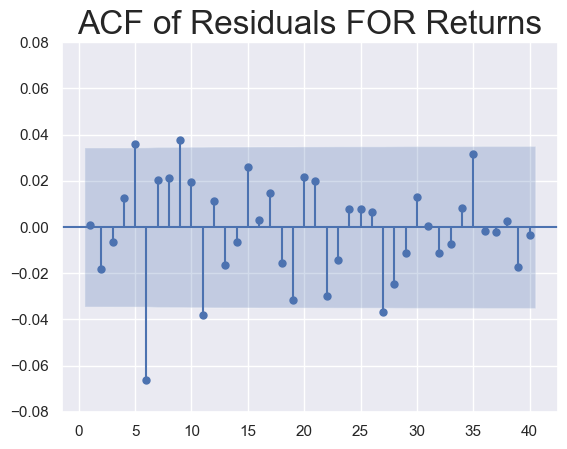

In [58]:
## Ploting ACF of Residual Returns
sgt.plot_acf(df.res_ret,lags=40,zero=False)
plt.ylim(-0.08,0.08)
plt.title("ACF of Residuals FOR Returns",size=24)

Text(0.5, 1.0, 'Residual of Returns')

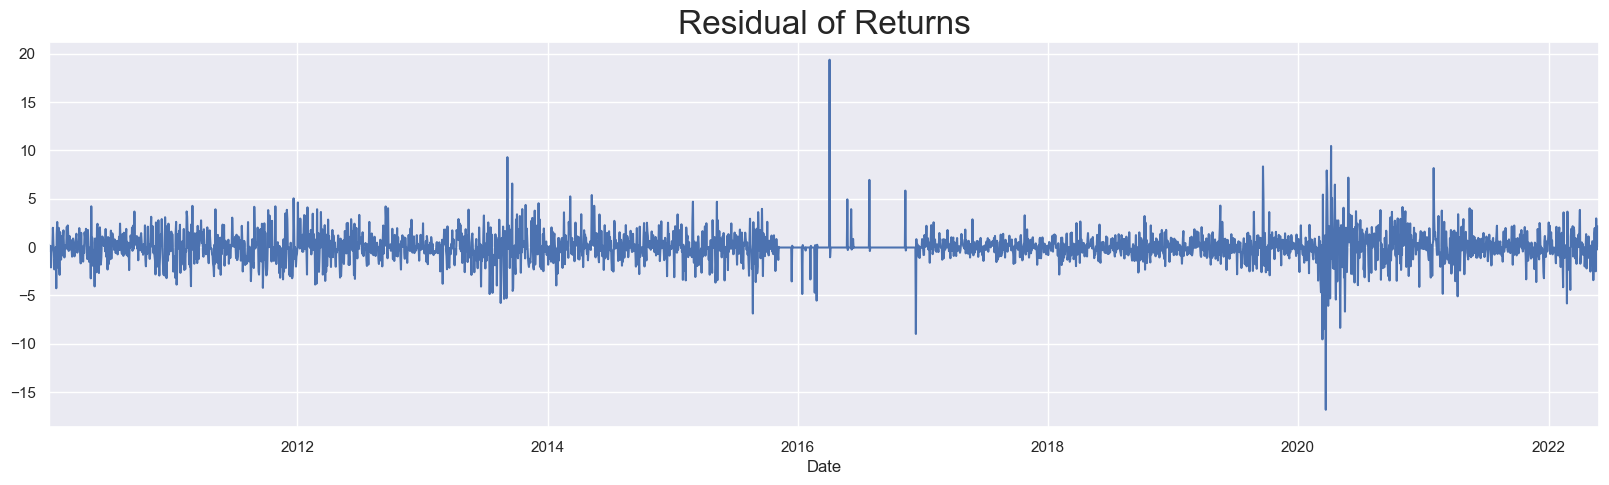

In [59]:
## Ploting Residual Returns
df.res_ret[1:].plot(figsize=(20,5))
plt.title("Residual of Returns",size=24)

## Forecasting the data for future Predictions

In [60]:
# create variables that will help us change the periods easily instead of typing them up every time
# make sure the start and end dates are business days, otherwise the code will result in an error
start_date='2022-06-1'
end_date='2025-01-01'

In [61]:
df_pred=result_ar2.predict(start=start_date,end=end_date)

Text(0.5, 1.0, 'predictions VS actual')

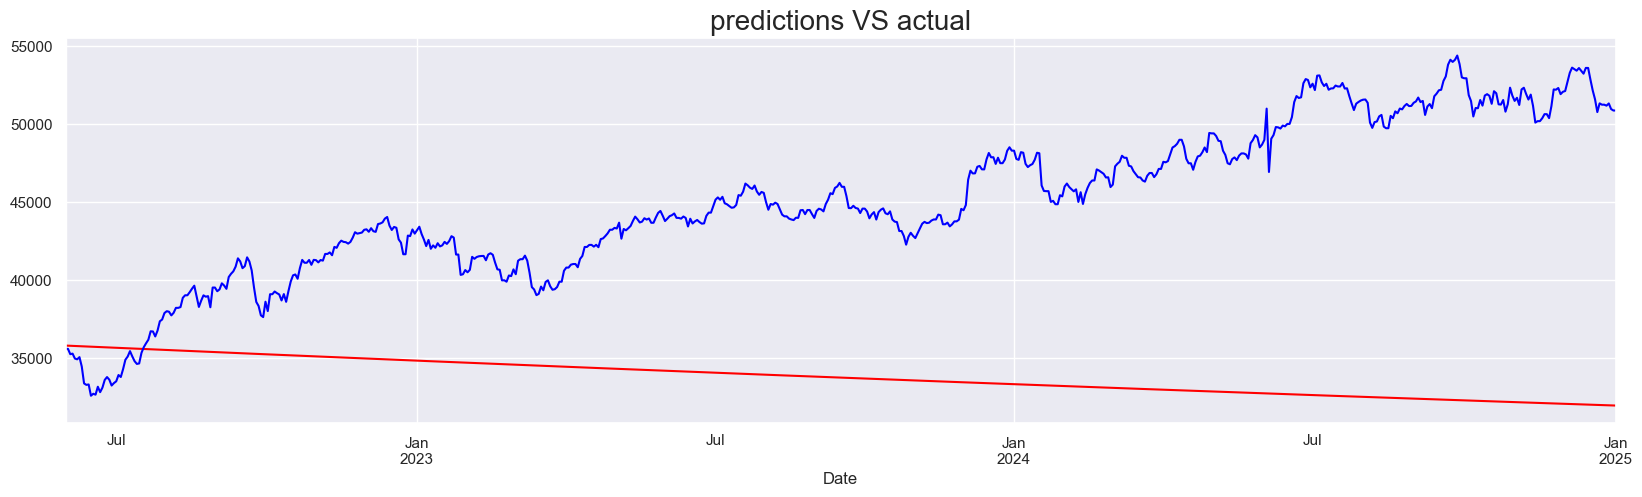

In [62]:
df_pred[start_date:end_date].plot(figsize=(20,5),color='red')
test.Market_value[start_date:end_date].plot(figsize=(20,5),color='blue')
plt.title("predictions VS actual",size=20)

In [63]:
df_pred_returns=results_ret_ar1.predict(start=start_date,end=end_date)

Text(0.5, 1.0, 'predictions VS actual')

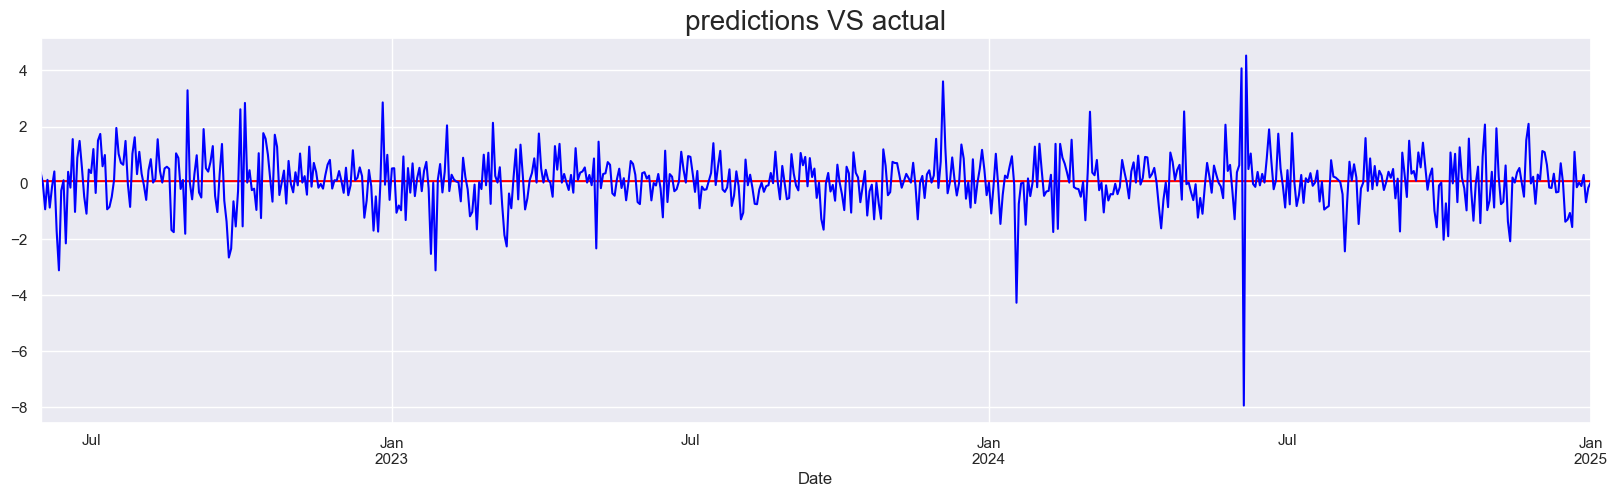

In [64]:
df_pred_returns[start_date:end_date].plot(figsize=(20,5),color='red')
test.returns[start_date:end_date].plot(figsize=(20,5),color='blue')
plt.title("predictions VS actual",size=20)

## a quick note that I will not use Any exogenous varianbles to brigten things up as they drastically improve model predictions
